https://developer.nvidia.com/blog/explain-your-machine-learning-model-predictions-with-gpu-accelerated-shap/


In [3]:
#Imports
from os import listdir
from os.path import isfile, join
import pandas as pd
from sklearn.model_selection import train_test_split

#Import de Lime 
import lime 
import lime.lime_tabular

#Import de SHAP
import subprocess
import sys
import importlib
import numpy
import shap
import xgboost

# Selección de métricas

In [4]:
# Creación del conjunto de datos de entreno y de test
dataset = pd.read_csv(('./datasets/method.csv'), index_col = 'Hash')
features = ["CC","CCL","CCO","CI","CLC","CLLC","LDC","LLDC","HCPL","HDIF","HEFF","HNDB","HPL","HPV","HTRP","HVOL","MI","MIMS","MISEI","MISM","McCC","NL","NLE","NII","NOI","CD","CLOC","DLOC","TCD","TCLOC","LLOC","LOC","NOS","NUMPAR","TLLOC","TLOC","TNOS","WarningBlocker","WarningCritical","WarningInfo","WarningMajor","WarningMinor","Android Rules","Basic Rules","Brace Rules","Clone Implementation Rules","Code Size Rules","Comment Rules","Controversial Rules","Coupling Rules","Design Rules","Empty Code Rules","Finalizer Rules","Import Statement Rules","J2EE Rules","JUnit Rules","Jakarta Commons Logging Rules","Java Logging Rules","JavaBean Rules","MigratingToJUnit4 Rules","Migration Rules","Migration13 Rules","Migration14 Rules","Migration15 Rules","Naming Rules","Optimization Rules","Security Code Guideline Rules","Strict Exception Rules","String and StringBuffer Rules","Type Resolution Rules","Unnecessary and Unused Code Rules","Vulnerability Rules"]
salida = "Buggy"
Y = dataset[salida]
X = dataset.loc[:, features]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

categorical = pd.Categorical(y_train)
y_train = categorical.codes
categorical = pd.Categorical(y_test)
y_test = categorical.codes

In [5]:
print("X_train")
display(X_train)
print("X_test")
display(X_test)
print("y_train")
display(y_train)
print("y_test")
display(y_test)


X_train


,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Migration14 Rules,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules
Hash,,,,,,,,,,,,,,,,,,,,,
14643623662424156294,0.0,0,0,0,0.0,0.0,0,0,180.8150,26.86670,...,0,0,0,0,0,0,0,0,0,0
5218368564902312543,0.0,0,0,0,0.0,0.0,0,0,401.6870,40.95450,...,0,0,0,0,0,0,0,1,0,0
4919331491239821274,0.0,0,0,0,0.0,0.0,0,0,113.9300,14.25000,...,0,0,0,0,0,0,0,0,0,0
8674818565936539611,0.0,0,0,0,0.0,0.0,0,0,115.6520,20.70000,...,0,0,0,0,0,0,0,0,0,0
13653537633054449405,0.0,0,0,0,0.0,0.0,0,0,320.7230,39.85710,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628037737716134744,0.0,0,0,0,0.0,0.0,0,0,13.6096,2.50000,...,0,0,0,0,0,0,0,0,0,0
15926864751516219475,0.0,0,0,0,0.0,0.0,0,0,68.8127,12.83330,...,0,0,0,0,0,0,0,0,0,0
6802102304208793870,0.0,0,0,0,0.0,0.0,0,0,54.6292,7.20000,...,0,0,0,0,0,0,0,1,0,0


X_test


,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Migration14 Rules,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules
Hash,,,,,,,,,,,,,,,,,,,,,
3373583164959757475,0.0,0,0,0,0.0,0.0,0,0,32.0000,5.00000,...,0,0,0,0,0,0,0,0,0,0
10749946785808220400,0.0,0,0,0,0.0,0.0,0,0,35.6096,5.60000,...,0,0,1,0,0,0,0,0,0,0
17445710018394986764,0.0,0,0,0,0.0,0.0,0,0,1129.0000,98.83140,...,0,0,0,1,0,0,0,0,0,0
7762520296057087548,0.0,0,0,0,0.0,0.0,0,0,503.7660,57.57140,...,0,0,0,0,0,0,0,0,0,0
18103641767022403455,1.0,1,7,1,1.0,1.0,16,16,134.5440,16.92310,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10512050086994795586,0.0,0,0,0,0.0,0.0,0,0,221.0440,28.70000,...,0,0,0,0,0,0,0,0,0,0
17486763880907035228,0.0,0,0,0,0.0,0.0,0,0,24.0000,4.00000,...,0,0,0,0,0,0,0,0,0,0
16613247097010034569,0.0,0,0,0,0.0,0.0,0,0,130.2110,32.50000,...,0,0,0,0,0,0,0,0,0,0


y_train


array([0, 1, 1, ..., 0, 1, 1], dtype=int8)

y_test


array([0, 0, 1, ..., 0, 1, 1], dtype=int8)

# Entrenamiento del modelo

In [6]:
#Construccion del modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
random_forest = RandomForestClassifier(random_state=0)
# Se entrena el modelo
random_forest.fit(X_train.values, y_train)  
random_forest.predict_proba([X_test.iloc[3]])

array([[0.41, 0.59]])

In [7]:
prediccion = random_forest.predict(X_test)
print(classification_report(y_test, prediccion))

X has feature names, but RandomForestClassifier was fitted without feature names


              precision    recall  f1-score   support

           0       0.75      0.87      0.80      7345
           1       0.57      0.37      0.45      3466

    accuracy                           0.71     10811
   macro avg       0.66      0.62      0.63     10811
weighted avg       0.69      0.71      0.69     10811



# SHAP

In [8]:
subset_to_explain = X_test.iloc[0:100]
explainer = shap.TreeExplainer(random_forest)

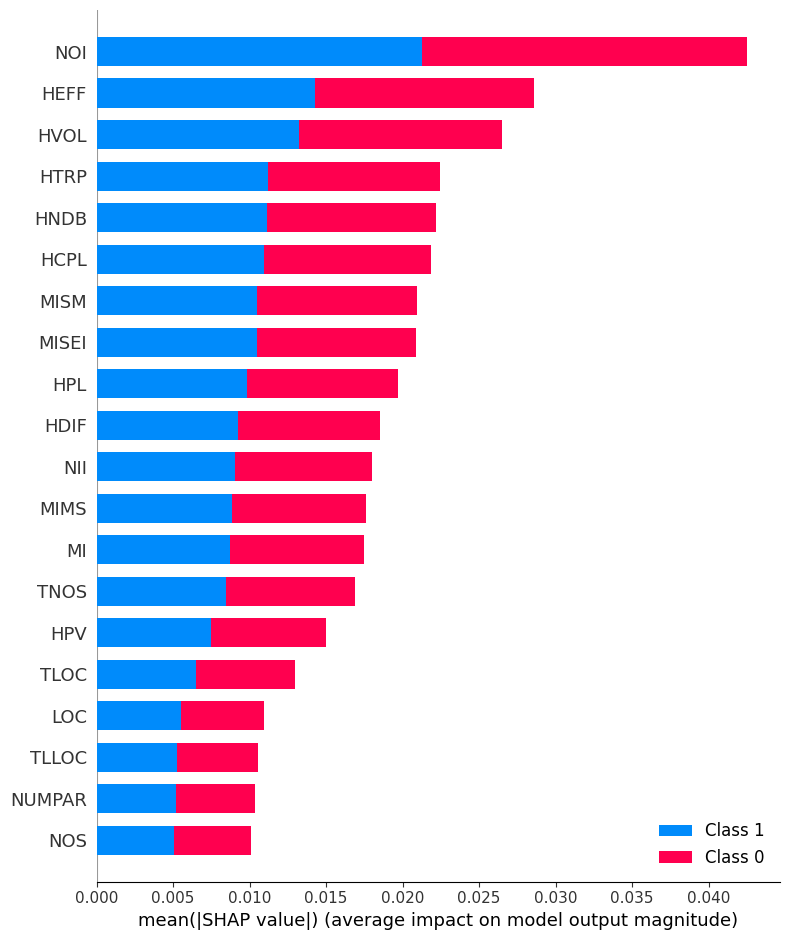

In [9]:
# shap_values = explainer.shap_values(subset_to_explain)
shap_values = explainer.shap_values(subset_to_explain)

shap.initjs()
shap.summary_plot(shap_values, subset_to_explain)

In [10]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], subset_to_explain)

In [11]:
display(X_test.iloc[0,:])
display(explainer.expected_value[1])
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

CC                                   0.0
CCL                                  0.0
CCO                                  0.0
CI                                   0.0
CLC                                  0.0
                                    ... 
Strict Exception Rules               0.0
String and StringBuffer Rules        0.0
Type Resolution Rules                0.0
Unnecessary and Unused Code Rules    0.0
Vulnerability Rules                  0.0
Name: 3373583164959757475, Length: 72, dtype: float64

0.3152704661082277

# Pruebas con CUDA

In [12]:
h, j = shap.datasets.adult()
model = xgboost.XGBClassifier()
model.fit(h, j)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [2]:
explainerCuda = shap.explainers.GPUTree(model, h)
shap_values = explainerCuda(h)
shap_values = shap_values
shap.plots.waterfall(shap_values[0])

cuda extension was not built during install!


ImportError: cannot import name '_cext_gpu' from partially initialized module 'shap' (most likely due to a circular import) (c:\Users\david\Desktop\Predictor de bugs\env\lib\site-packages\shap\__init__.py)